In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DT=pd.read_csv("delivery_time.csv")
DT

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
DT.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'DeliveryTime')

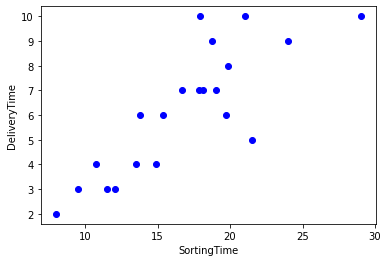

In [3]:
plt.plot(DT.DeliveryTime,DT.SortingTime,"bo")
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")

In [4]:
#Correlation Analysis
DT.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [6]:
#Model Building (SLR model)
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data=DT).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        13:58:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

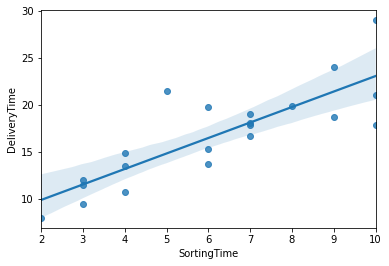

In [8]:
import seaborn as sns
sns.regplot(x="SortingTime",y="DeliveryTime",data=DT)

In [12]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [14]:
#Model Building (logarithmic transformation model)
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
modellog=smf.ols("DeliveryTime~np.log(SortingTime)",data=DT).fit()

In [17]:
modellog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        14:10:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
modellog.params

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [20]:
#Model Building(Exponential transformation model)
modelexpo=smf.ols("DeliveryTime~np.exp(SortingTime)",data=DT).fit()

In [21]:
modelexpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 07 Oct 2021   Prob (F-statistic):            0.00396
Time:                        14:14:34   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(SortingTime)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
modelexpo.params

Intercept              15.083578
np.exp(SortingTime)     0.000393
dtype: float64

In [23]:
#Model Building(Squareroot transformation model)
modelsqrt=smf.ols("DeliveryTime~np.sqrt(SortingTime)",data=DT).fit()

In [24]:
modelsqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.61e-06
Time:                        14:17:45   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(SortingTime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
modelsqrt.params

Intercept              -2.518837
np.sqrt(SortingTime)    7.936591
dtype: float64

In [37]:
DT["SortingTime_Sq"]=DT.SortingTime*DT.SortingTime
DT["SortingTime_Sq"]

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: SortingTime_Sq, dtype: int64

In [38]:
#Model building(Square Transformation Model)
modelsq=smf.ols("(DeliveryTime)~SortingTime+SortingTime_Sq",data=DT).fit()

In [39]:
modelsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.39e-05
Time:                        14:34:23   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5222      4.160      0.847      0.408      -5.217      12.261
SortingTime        2.8130      1.461      1.926      0.070      -0.256       5.882
SortingTime_Sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
modelsq.params

Intercept         3.522234
SortingTime       2.813002
SortingTime_Sq   -0.093198
dtype: float64

In [42]:
#Model Building (Logarithmic+Square Transformation Model)
modellogsq=smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_Sq",data=DT).fit()

In [43]:
modellogsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Thu, 07 Oct 2021   Prob (F-statistic):           2.20e-06
Time:                          14:37:41   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
modellogsq.params

Intercept         1.699704
SortingTime       0.265922
SortingTime_Sq   -0.012841
dtype: float64

In [50]:
pred_logsq = modellogsq.predict(DT)
pred5=np.exp(pred_logsq)
pred5
rmse_logsq = np.sqrt(np.mean((np.array(DT['DeliveryTime'])-np.array(pred5))**2))
rmse_logsq

2.799041988740925

In [53]:
data = {"MODEL":pd.Series(["model","modellog","modelexpo","modelsqrt","modelsq","modellogsq"]),
       "Rsquare":pd.Series([model.rsquared,modellog.rsquared,modelexpo.rsquared,modelsqrt.rsquared,modelsq.rsquared,modellogsq.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,Rsquare
0,model,0.682271
1,modellog,0.695443
2,modelexpo,0.361118
3,modelsqrt,0.695806
4,modelsq,0.693440
5,modellogsq,0.764867


In [ ]:
#The Rsquare value using Logarithmic+square transformation model is more than 0.75 which is 0.76. Hence, considering it as best model


In [59]:
#Predicting delivery time using sorting time
newdata=pd.Series([5,8])

In [60]:
data_pred=pd.DataFrame(newdata,columns=["SortingTime"])

In [61]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64